# K-Means Clustering Implementation

This notebook implements K-Means clustering from scratch, following the GeeksforGeeks guide but adapted to use the `data.txt` file instead of sklearn's `make_blobs`.

**K-Means Clustering** is an unsupervised machine learning algorithm that groups data points into k clusters based on their similarity using Euclidean distance.


## Step 1: Importing the Necessary Libraries

We will be importing the following libraries:
- **NumPy**: for numerical operations (e.g., distance calculation)
- **Matplotlib**: for plotting data and results


In [12]:
import numpy as np
import matplotlib.pyplot as plt



## Step 2: Loading Data from data.txt

Instead of using `make_blobs` from sklearn, we will load our dataset from `data.txt`. Each line contains two space-separated floating-point values (x, y coordinates).


In [13]:
# Function to load data from data.txt file
def load_data(filename):
    """
    Load 2D data points from a text file.
    Each line should contain two space-separated floating-point values.
    """
    data = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if line:  # Skip empty lines
                parts = line.split()
                if len(parts) >= 2:
                    x, y = float(parts[0]), float(parts[1])
                    data.append([x, y])
    return np.array(data)

# Load the data
X = load_data('data.txt')
print(f"Loaded {X.shape[0]} data points with {X.shape[1]} features")
print(f"Data shape: {X.shape}")
print(f"\nFirst 5 data points:")
print(X[:5])


Loaded 5000 data points with 2 features
Data shape: (5000, 2)

First 5 data points:
[[ 0.009519 -0.636513]
 [ 0.977144 -0.823159]
 [-0.001936  0.65852 ]
 [ 0.626724 -0.770501]
 [-0.694547 -0.028682]]


## Step 3: Plotting the Raw Dataset

Let's visualize our dataset to see the distribution of data points.


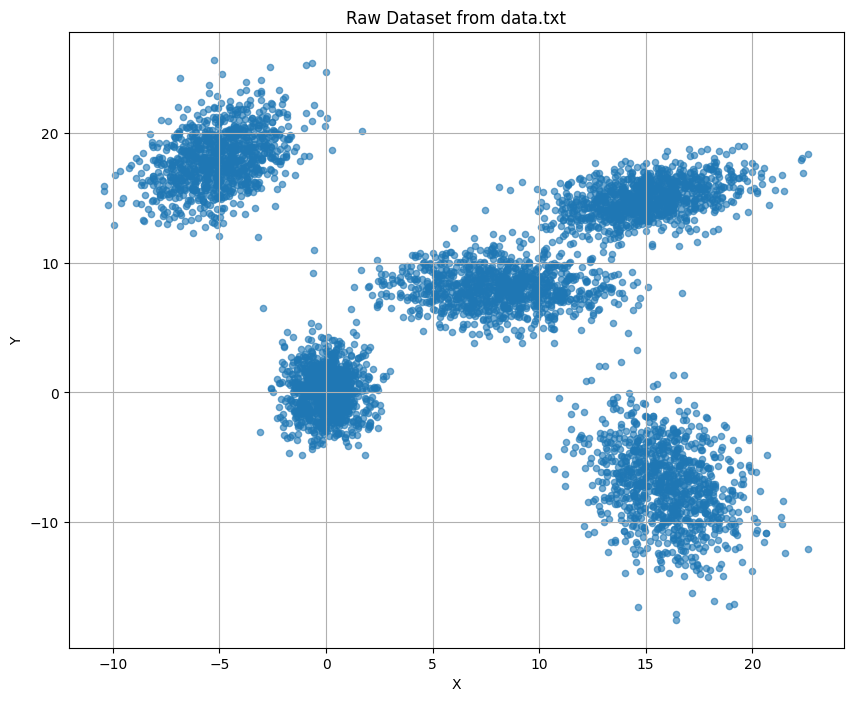

In [14]:
fig = plt.figure(figsize=(10, 8))
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=20)
plt.title('Raw Dataset from data.txt')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## Step 4: Initializing Random Centroids

We will randomly initialize k centroids for K-Means clustering. The number of clusters `k` represents how many groups we want to classify our items into.

Let's set k = 3 (you can change this value to experiment with different numbers of clusters).


In [15]:
k = 3  # Number of clusters

clusters = {}
np.random.seed(23)  # For reproducibility

# Get data range for better initialization
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

for idx in range(k):
    # Random center within data range
    center = np.array([
        np.random.uniform(x_min, x_max),
        np.random.uniform(y_min, y_max)
    ])
    points = []
    cluster = {
        'center': center,
        'points': []
    }
    clusters[idx] = cluster

# Display the initialized clusters
print("Initialized centroids:")
for i in clusters:
    center = clusters[i]['center']
    print(f"Cluster {i}: center = ({center[0]:.4f}, {center[1]:.4f})")
    
clusters


Initialized centroids:
Cluster 0: center = (6.6717, 23.3510)
Cluster 1: center = (14.8742, -5.3316)
Cluster 2: center = (-3.1202, 12.0974)


{0: {'center': array([ 6.67174987, 23.35097981]), 'points': []},
 1: {'center': array([14.87419298, -5.33164844]), 'points': []},
 2: {'center': array([-3.12022336, 12.09744771]), 'points': []}}

## Step 5: Plotting Random Initialized Centers with Data Points

Let's visualize the data points along with the initial random centroids (marked with red stars).


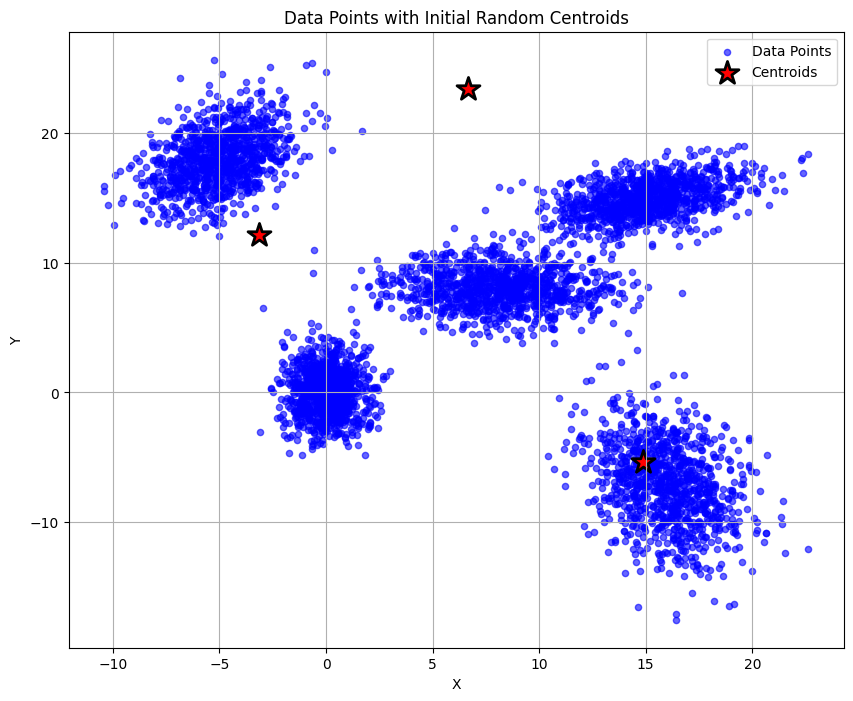

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=20, c='blue', label='Data Points')
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='*', c='red', s=300, 
               edgecolors='black', linewidths=2, label='Centroids' if i == 0 else '')
plt.title('Data Points with Initial Random Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## Step 6: Defining Euclidean Distance

To assign data points to the nearest centroid, we need to calculate the distance between points. We'll use Euclidean distance as our measurement.

**Euclidean Distance Formula**: √((x₁-x₂)² + (y₁-y₂)²)


In [17]:
def distance(p1, p2):
    """
    Calculate Euclidean distance between two points.
    p1 and p2 are numpy arrays representing points.
    """
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Test the distance function
test_p1 = np.array([0, 0])
test_p2 = np.array([3, 4])
print(f"Distance between (0,0) and (3,4): {distance(test_p1, test_p2):.2f}")
print("(Should be 5.0)")


Distance between (0,0) and (3,4): 5.00
(Should be 5.0)


## Step 7: Creating Assign and Update Functions

We need two key functions:
1. **assign_clusters**: Assigns each data point to the nearest centroid
2. **update_clusters**: Recalculates the centroids based on the average of points assigned to each cluster


In [18]:
def assign_clusters(X, clusters, k):
    """
    Assign each data point to the nearest centroid.
    """
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)
        
        curr_cluster = np.argmin(dist)  # Find the index of the closest cluster
        clusters[curr_cluster]['points'].append(curr_x)
    
    return clusters

def update_clusters(X, clusters, k):
    """
    Recalculate centroids based on assigned points.
    """
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis=0)  # Calculate mean of points in cluster
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []  # Clear points for next iteration
    return clusters

print("Functions defined successfully!")


Functions defined successfully!


## Step 8: Running the K-Means Algorithm

Now we'll run the K-Means algorithm iteratively:
1. Assign points to nearest centroids
2. Update centroids based on assigned points
3. Repeat until convergence (centroids stop changing) or maximum iterations reached


In [19]:
# Reset clusters for the algorithm
clusters = {}
np.random.seed(23)
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

for idx in range(k):
    center = np.array([
        np.random.uniform(x_min, x_max),
        np.random.uniform(y_min, y_max)
    ])
    clusters[idx] = {
        'center': center,
        'points': []
    }

# Run K-Means algorithm
max_iters = 100
tolerance = 1e-4
prev_centers = None
max_change = float('inf')  # Initialize max_change

for iteration in range(max_iters):
    # Assign points to nearest centroids
    clusters = assign_clusters(X, clusters, k)
    
    # Update centroids
    clusters = update_clusters(X, clusters, k)
    
    # Check for convergence
    if prev_centers is not None:
        max_change = 0
        for i in range(k):
            change = distance(clusters[i]['center'], prev_centers[i])
            max_change = max(max_change, change)
        
        if max_change < tolerance:
            print(f"Converged after {iteration + 1} iterations")
            break
    
    # Store current centers for next iteration
    prev_centers = [clusters[i]['center'].copy() for i in range(k)]
    
    # Print progress every 10 iterations (only if we have a valid max_change)
    if prev_centers is not None and (iteration + 1) % 10 == 0:
        print(f"Iteration {iteration + 1}: Max centroid change = {max_change:.6f}")

print(f"\nAlgorithm completed in {iteration + 1} iterations")


Converged after 9 iterations

Algorithm completed in 9 iterations


## Step 9: Predicting the Cluster for the Data Points

Create a function to predict the cluster assignment for each data point based on the final centroids.


In [20]:
def pred_cluster(X, clusters, k):
    """
    Predict cluster assignment for each data point.
    """
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i], clusters[j]['center']))
        pred.append(np.argmin(dist))  # Append index of closest cluster
    return pred

# Predict clusters for all data points
pred = pred_cluster(X, clusters, k)

# Display some predictions
print("First 10 predictions:")
print(pred[:10])
print(f"\nTotal predictions: {len(pred)}")


First 10 predictions:
[np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2)]

Total predictions: 5000


## Step 10: Plotting Data Points with Predicted Cluster Centers

Finally, let's visualize the data points colored by their predicted clusters, along with the final centroids (marked with red triangles).


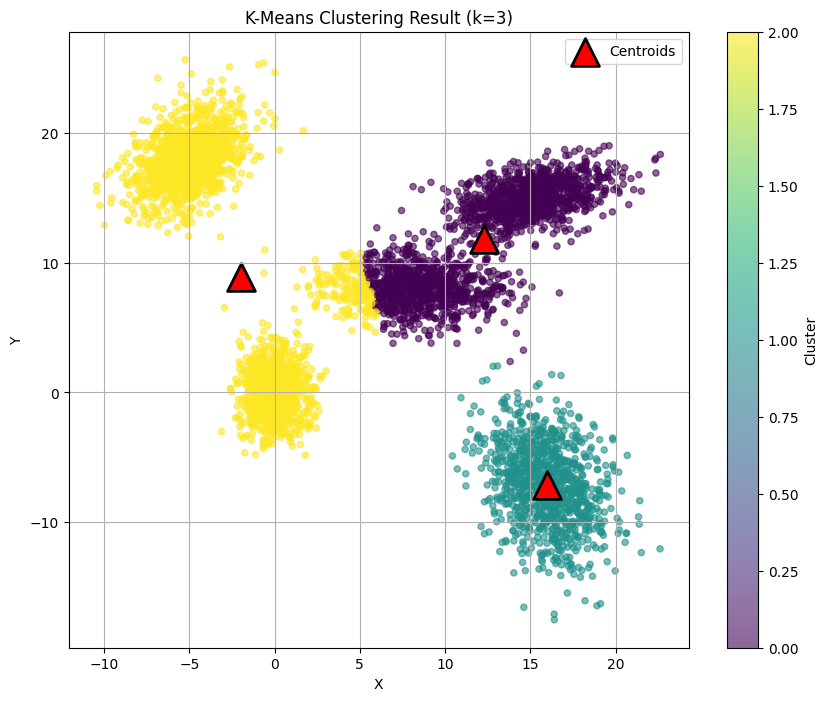

In [21]:
plt.figure(figsize=(10, 8))
plt.grid(True)

# Plot data points colored by cluster
scatter = plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='viridis', 
                     alpha=0.6, s=20)

# Plot centroids
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='^', c='red', s=400,
               edgecolors='black', linewidths=2, label='Centroids' if i == 0 else '')

plt.colorbar(scatter, label='Cluster')
plt.title(f'K-Means Clustering Result (k={k})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## Results Summary

Let's display the final cluster centers and the number of points in each cluster.


In [22]:
# Print cluster centers
print("Final Cluster Centers:")
for i in range(k):
    center = clusters[i]['center']
    print(f"Cluster {i}: ({center[0]:.4f}, {center[1]:.4f})")

# Count points in each cluster
unique, counts = np.unique(pred, return_counts=True)
print("\nPoints per cluster:")
for cluster_id, count in zip(unique, counts):
    print(f"Cluster {cluster_id}: {count} points")
    
print(f"\nTotal data points: {len(pred)}")


Final Cluster Centers:
Cluster 0: (12.2559, 11.8054)
Cluster 1: (15.9506, -7.1421)
Cluster 2: (-1.9656, 8.9296)

Points per cluster:
Cluster 0: 1829 points
Cluster 1: 997 points
Cluster 2: 2174 points

Total data points: 5000


---

# Part B: Choosing k with the Elbow Method

**Building on Part A**: In Part A, we implemented K-Means clustering from scratch. Now we'll use those functions to find the optimal number of clusters (k) using the Elbow Method.

## Understanding the Problem

**The Challenge**: In Part A, we manually chose k=3. But how do we know that's the optimal number of clusters? 

- Too few clusters (k=2): We might be grouping dissimilar points together
- Too many clusters (k=10): We might be splitting natural groups unnecessarily
- **The Goal**: Find the optimal k that balances between these extremes

## What is the Elbow Method?

The **Elbow Method** is a heuristic technique to find the optimal number of clusters. Here's the intuition:

1. **SSE (Sum of Squared Errors)**: Also called "within-cluster sum of squares" or "distortion"
   - Measures how "tight" or "compact" each cluster is
   - Lower SSE = points are closer to their centroids = better clustering
   - Formula: For each cluster, sum the squared distances from each point to its centroid
   - **We'll calculate this using our `distance()` function from Part A**

2. **The Trade-off**:
   - As k increases, SSE decreases (more clusters = tighter clusters)
   - But there's a point where adding more clusters doesn't help much
   - **The "elbow"** is where the rate of improvement slows down dramatically

3. **Visual Interpretation**: Plot SSE vs k, and look for the "elbow" - the point where the curve bends sharply

4. **Implementation**: We'll use our `kmeans_fall2025()` function (which wraps Part A functions) in a loop over different k values


## Step 1: Create Helper Functions for Elbow Method

We'll build on the functions we already created in Part A:
- ✅ `distance()` - already defined
- ✅ `assign_clusters()` - already defined  
- ✅ `update_clusters()` - already defined
- ✅ `pred_cluster()` - already defined

We need to add:
- `initialize_centroids()` - helper function to initialize centroids (extracted from Part A)
- `calculate_sse()` - new function to calculate Sum of Squared Errors
- `kmeans_fall2025()` - wrapper function that runs K-means and returns SSE


In [ ]:
# Helper function: Initialize centroids (extracted from Part A pattern)
def initialize_centroids(X, k, random_seed=23):
    """
    Initialize k random centroids within the data range.
    This extracts the initialization logic from Part A into a reusable function.
    """
    np.random.seed(random_seed)
    clusters = {}
    
    # Get data range for better initialization (same as Part A)
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    
    for idx in range(k):
        center = np.array([
            np.random.uniform(x_min, x_max),
            np.random.uniform(y_min, y_max)
        ])
        clusters[idx] = {
            'center': center,
            'points': []
        }
    
    return clusters

# New function: Calculate SSE (Sum of Squared Errors)
def calculate_sse(X, clusters, predictions, k):
    """
    Calculate Sum of Squared Errors (SSE) / Within-Cluster Sum of Squares.
    
    SSE measures how "tight" the clusters are. Lower SSE = tighter clusters.
    
    Formula: For each point, calculate squared distance to its assigned centroid,
    then sum all these squared distances.
    
    Uses the distance() function from Part A.
    """
    sse = 0.0
    
    for i in range(X.shape[0]):
        # Get the cluster this point belongs to
        cluster_id = predictions[i]
        # Get the centroid of that cluster
        centroid = clusters[cluster_id]['center']
        # Calculate squared distance from point to its centroid
        # Uses distance() function from Part A
        squared_distance = distance(X[i], centroid) ** 2
        # Add to total SSE
        sse += squared_distance
    
    return sse

# Main function: kmeans_fall2025() - builds on Part A functions
def kmeans_fall2025(X, k, max_iters=100, random_seed=23, tolerance=1e-4):
    """
    Complete K-Means clustering function that returns clusters, predictions, and SSE.
    
    This function uses all the functions we created in Part A:
    - initialize_centroids() - initializes starting centroids
    - assign_clusters() - assigns points to nearest centroids (from Part A)
    - update_clusters() - updates centroids based on assignments (from Part A)
    - pred_cluster() - gets final cluster assignments (from Part A)
    - calculate_sse() - calculates SSE for elbow method
    
    Parameters:
    - X: numpy array of data points (n_samples, n_features)
    - k: number of clusters
    - max_iters: maximum number of iterations
    - random_seed: random seed for reproducibility
    - tolerance: convergence threshold
    
    Returns:
    - clusters: dictionary with cluster centers
    - predictions: cluster assignments for each data point
    - sse: Sum of Squared Errors (within-cluster sum of squares)
    """
    # Initialize centroids
    clusters = initialize_centroids(X, k, random_seed)
    
    prev_centers = None
    
    # Run K-Means algorithm (same logic as Part A, Step 8)
    for iteration in range(max_iters):
        # Use functions from Part A
        clusters = assign_clusters(X, clusters, k)  # From Part A
        clusters = update_clusters(X, clusters, k)   # From Part A
        
        # Check for convergence (same as Part A)
        if prev_centers is not None:
            max_change = 0
            for i in range(k):
                change = distance(clusters[i]['center'], prev_centers[i])  # From Part A
                max_change = max(max_change, change)
            
            if max_change < tolerance:
                break
        
        # Store current centers for next iteration
        prev_centers = [clusters[i]['center'].copy() for i in range(k)]
    
    # Get final predictions using Part A function
    predictions = pred_cluster(X, clusters, k)  # From Part A
    
    # Calculate SSE (new function for elbow method)
    sse = calculate_sse(X, clusters, predictions, k)
    
    return clusters, predictions, sse

print("✓ Helper functions created!")
print("✓ kmeans_fall2025() function created!")
print("✓ All functions build on Part A code!")


kmeans_fall2025() function created!


## Step 2: Understanding SSE (Sum of Squared Errors)

**SSE Formula**: For each cluster, sum the squared distances from each point to its centroid.

```
SSE = Σ (distance(point, centroid))² for all points in all clusters
```

**Why squared?** 
- Penalizes larger distances more heavily
- Makes the math cleaner (no square roots needed)
- Standard metric in clustering

**Note**: The `calculate_sse()` function was already created above. It uses the `distance()` function from Part A.


In [ ]:
# Test the kmeans_fall2025 function to make sure it works with Part A functions
print("Testing kmeans_fall2025() with k=3...")
test_clusters, test_pred, test_sse = kmeans_fall2025(X, k=3, random_seed=23)
print(f"✓ SSE for k=3: {test_sse:.2f}")
print(f"✓ Number of clusters: {len(test_clusters)}")
print(f"✓ Number of predictions: {len(test_pred)}")
print("✓ All functions working correctly with Part A code!")


Test SSE for k=3: 258251.58
kmeans_fall2025() function working correctly!


## Step 3: Run K-Means for Multiple k Values

Now we'll run `kmeans_fall2025()` for different values of k (e.g., k=1 to k=10) and calculate the SSE for each.

**What to expect:**
- k=1: Very high SSE (all points far from single centroid)
- As k increases: SSE decreases (more centroids = points closer to centroids)
- Eventually: Diminishing returns (adding more clusters doesn't help much)


In [32]:
# Define range of k values to test
k_range = range(1, 11)  # Test k from 1 to 10
sse_values = []  # Store SSE for each k
all_clusters = {}  # Store clusters for each k
all_predictions = {}  # Store predictions for each k

print("Running K-Means for different k values...")
print("-" * 50)

for k in k_range:
    # Run K-Means for this k value
    # Note: We use different random seeds for each k to ensure fair comparison
    clusters, predictions, sse = kmeans_fall2025(X, k=k, max_iters=100, 
                                                   random_seed=42, tolerance=1e-4)
    
    # Store results
    sse_values.append(sse)
    all_clusters[k] = clusters
    all_predictions[k] = predictions
    
    print(f"k = {k:2d}: SSE = {sse:12.2f}")

print("-" * 50)
print("Done!")


Running K-Means for different k values...
--------------------------------------------------
k =  1: SSE =    812698.84
k =  2: SSE =    479335.73
k =  3: SSE =    328628.15
k =  4: SSE =    325054.97
k =  5: SSE =     82943.26
k =  6: SSE =     81972.19
k =  7: SSE =     35612.54
k =  8: SSE =     35612.54
k =  9: SSE =     33469.73
k = 10: SSE =     29324.06
--------------------------------------------------
Done!


## Step 4: Plot SSE vs k (The Elbow Plot)

Now we'll visualize the SSE values. The "elbow" is where the curve bends sharply - this is our optimal k!


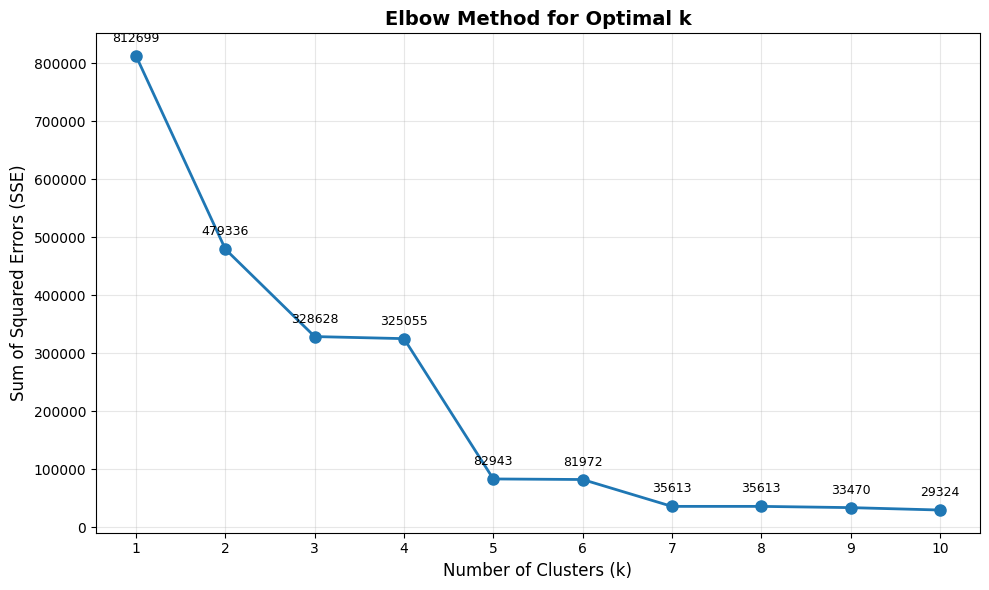

Elbow plot created! Look for the 'bend' in the curve.


In [33]:
# Create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(list(k_range), sse_values, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(list(k_range))

# Add annotations for each point
for k, sse in zip(k_range, sse_values):
    plt.annotate(f'{sse:.0f}', (k, sse), textcoords="offset points", 
                 xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("Elbow plot created! Look for the 'bend' in the curve.")


## Step 5: Identify the Elbow Point

**How to identify the elbow:**

1. **Visual inspection**: Look for where the curve bends sharply (like an elbow)
2. **Rate of change**: Calculate the rate of decrease in SSE
   - Large decrease = still improving
   - Small decrease = diminishing returns (elbow region)

Let's calculate the rate of change to help identify the elbow:


In [34]:
# Calculate the rate of change (decrease) in SSE
# This helps identify where the improvement slows down
sse_decreases = []
for i in range(1, len(sse_values)):
    decrease = sse_values[i-1] - sse_values[i]  # How much SSE decreased
    percent_decrease = (decrease / sse_values[i-1]) * 100  # Percentage decrease
    sse_decreases.append(percent_decrease)

# Print the decreases
print("SSE Decrease Analysis:")
print("-" * 60)
print(f"{'k':>4} → {'k+1':>4} | {'SSE Decrease':>15} | {'% Decrease':>12}")
print("-" * 60)
for i, decrease_pct in enumerate(sse_decreases):
    k_from = list(k_range)[i]
    k_to = list(k_range)[i+1]
    decrease_val = sse_values[i] - sse_values[i+1]
    print(f"{k_from:>4} → {k_to:>4} | {decrease_val:>15.2f} | {decrease_pct:>11.2f}%")

print("-" * 60)
print("\nInterpretation:")
print("- Large % decrease = Still getting significant improvement")
print("- Small % decrease = Diminishing returns (elbow region)")
print("- Look for where the % decrease drops significantly")


SSE Decrease Analysis:
------------------------------------------------------------
   k →  k+1 |    SSE Decrease |   % Decrease
------------------------------------------------------------
   1 →    2 |       333363.11 |       41.02%
   2 →    3 |       150707.58 |       31.44%
   3 →    4 |         3573.18 |        1.09%
   4 →    5 |       242111.71 |       74.48%
   5 →    6 |          971.08 |        1.17%
   6 →    7 |        46359.64 |       56.56%
   7 →    8 |            0.00 |        0.00%
   8 →    9 |         2142.81 |        6.02%
   9 →   10 |         4145.67 |       12.39%
------------------------------------------------------------

Interpretation:
- Large % decrease = Still getting significant improvement
- Small % decrease = Diminishing returns (elbow region)
- Look for where the % decrease drops significantly


## Step 6: Visualize the Rate of Change

Let's plot the percentage decrease to make the elbow more obvious:


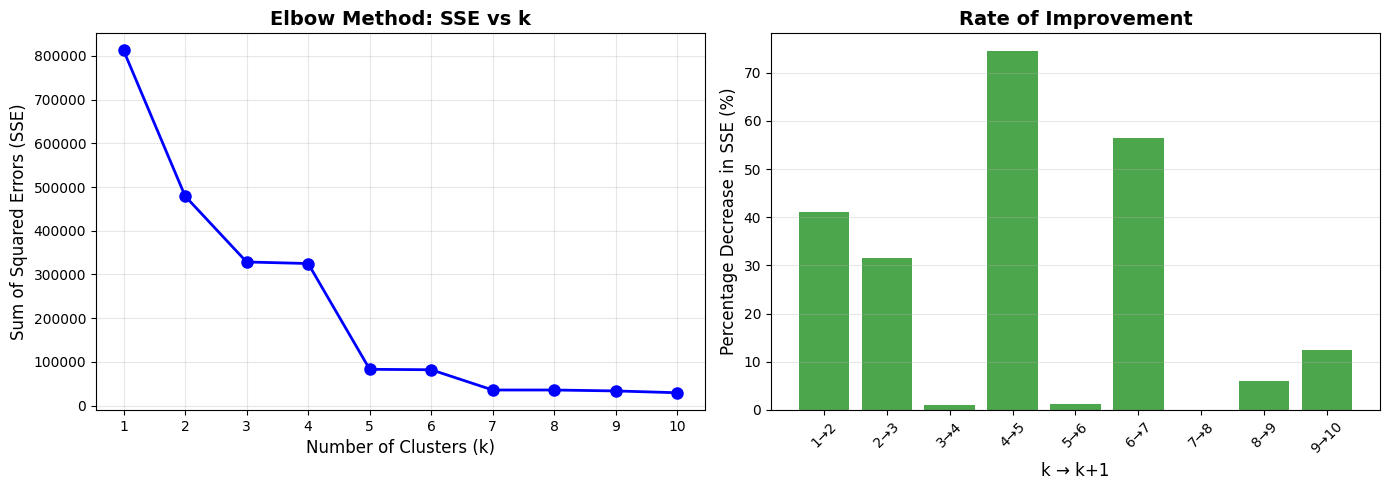

The elbow is typically where the rate of decrease drops significantly!


In [35]:
# Plot both SSE and rate of change
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: SSE vs k
ax1.plot(list(k_range), sse_values, marker='o', linewidth=2, markersize=8, color='blue')
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Sum of Squared Errors (SSE)', fontsize=12)
ax1.set_title('Elbow Method: SSE vs k', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(list(k_range))

# Plot 2: Rate of change (% decrease)
k_pairs = [f"{k1}→{k2}" for k1, k2 in zip(list(k_range)[:-1], list(k_range)[1:])]
ax2.bar(k_pairs, sse_decreases, color='green', alpha=0.7)
ax2.set_xlabel('k → k+1', fontsize=12)
ax2.set_ylabel('Percentage Decrease in SSE (%)', fontsize=12)
ax2.set_title('Rate of Improvement', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("The elbow is typically where the rate of decrease drops significantly!")


## Step 7: Choose Optimal k and Visualize

Based on the elbow plot, choose your optimal k. Common approaches:

1. **Visual elbow**: Where the curve bends sharply
2. **Rate of change**: Where % decrease drops below a threshold (e.g., < 10%)
3. **Domain knowledge**: Sometimes you know how many clusters you expect

**For this example**, let's use k=4 (you can change this based on your analysis):


Selected optimal k = 4
SSE for k=4: 325054.97


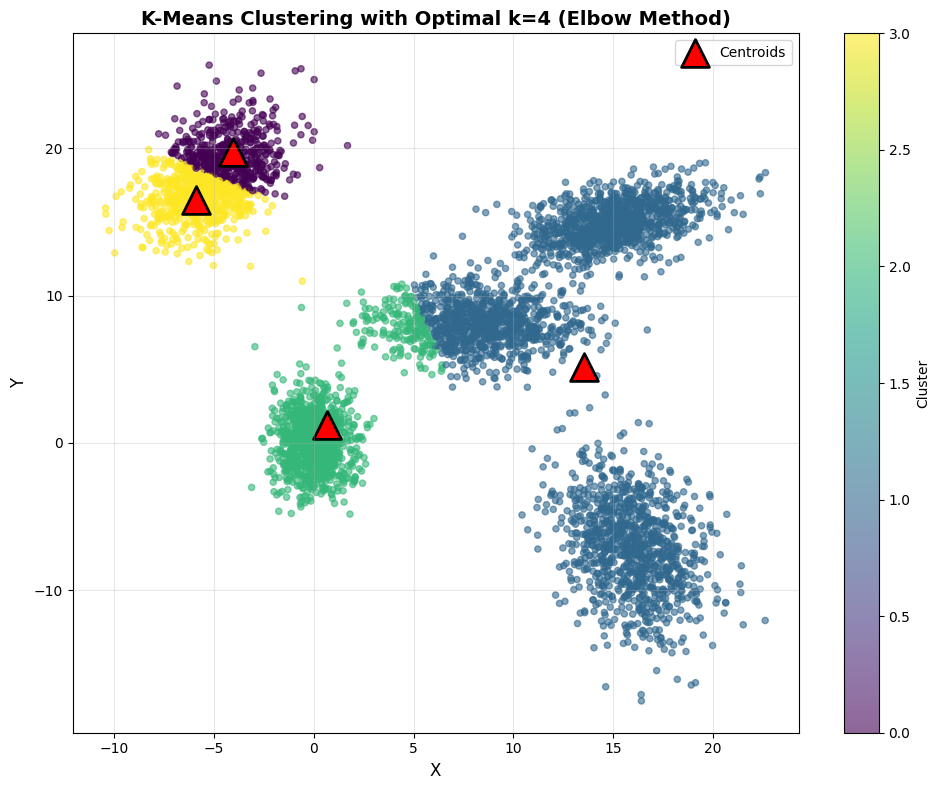


Final Cluster Centers (k=4):
Cluster 0: (-4.0552, 19.7554)
Cluster 1: (13.5602, 5.1276)
Cluster 2: (0.6677, 1.1793)
Cluster 3: (-5.9062, 16.4520)

Points per cluster:
Cluster 0: 468 points
Cluster 1: 2825 points
Cluster 2: 1174 points
Cluster 3: 533 points


In [36]:
# Choose optimal k based on elbow analysis
# TODO: Change this based on your elbow plot analysis!
optimal_k = 4  # Example: if elbow is at k=4

print(f"Selected optimal k = {optimal_k}")
print(f"SSE for k={optimal_k}: {sse_values[optimal_k - min(k_range)]:.2f}")

# Get the clusters and predictions for optimal k
final_clusters = all_clusters[optimal_k]
final_predictions = all_predictions[optimal_k]

# Visualize the clustering with optimal k
plt.figure(figsize=(10, 8))
plt.grid(True, alpha=0.3)

# Plot data points colored by cluster
scatter = plt.scatter(X[:, 0], X[:, 1], c=final_predictions, cmap='viridis', 
                     alpha=0.6, s=20)

# Plot centroids
for i in range(optimal_k):
    center = final_clusters[i]['center']
    plt.scatter(center[0], center[1], marker='^', c='red', s=400,
               edgecolors='black', linewidths=2, label='Centroids' if i == 0 else '')

plt.colorbar(scatter, label='Cluster')
plt.title(f'K-Means Clustering with Optimal k={optimal_k} (Elbow Method)', 
          fontsize=14, fontweight='bold')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Print cluster information
print(f"\nFinal Cluster Centers (k={optimal_k}):")
for i in range(optimal_k):
    center = final_clusters[i]['center']
    print(f"Cluster {i}: ({center[0]:.4f}, {center[1]:.4f})")

# Count points in each cluster
unique, counts = np.unique(final_predictions, return_counts=True)
print(f"\nPoints per cluster:")
for cluster_id, count in zip(unique, counts):
    print(f"Cluster {cluster_id}: {count} points")


## Summary: How to Determine the Elbow

**Method 1: Visual Inspection**
- Look at the SSE vs k plot
- Find where the curve bends sharply (like an elbow)
- This is your optimal k

**Method 2: Rate of Change Analysis**
- Calculate the percentage decrease in SSE for each k → k+1
- When the % decrease drops significantly (e.g., from 50% to 10%), you've found the elbow
- The k value BEFORE the small decrease is often optimal

**Method 3: Domain Knowledge**
- Sometimes you know how many clusters you expect
- Use the elbow method to validate your choice

**Key Insight**: 
- The elbow represents the point where adding more clusters doesn't significantly improve the clustering quality
- Before the elbow: Adding clusters helps a lot
- After the elbow: Adding clusters helps very little (diminishing returns)

**Note**: The elbow method is a heuristic - it's not always clear-cut. Use it as a guide along with domain knowledge!


## Optional: Experimenting with Different Values of k

You can change the value of `k` in Step 4 to experiment with different numbers of clusters. Common values to try:
- k = 2, 3, 4, 5
- Use the Elbow Method to find the optimal k (not covered in this notebook)

**Note**: To run with a different k, go back to Step 4, change the value, and re-run all subsequent cells.
